In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("salary_purchased.csv")

In [3]:
df.head(10)

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes
5,France,35.0,58000.0,Yes
6,Spain,NaN,52000.0,No
7,France,48.0,79000.0,Yes
8,Germany,50.0,83000.0,No
9,France,37.0,67000.0,Yes


In [4]:
df.shape

(10, 4)

In [5]:
wf = df.copy()

In [6]:
wf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Country    10 non-null     object 
 1   Age        9 non-null      float64
 2   Salary     9 non-null      float64
 3   Purchased  10 non-null     object 
dtypes: float64(2), object(2)
memory usage: 448.0+ bytes


In [7]:
wf.isnull().sum()

Country      0
Age          1
Salary       1
Purchased    0
dtype: int64

In [8]:
wf.duplicated().sum()

0

In [9]:
wf['Country'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [10]:
wf['Country'].value_counts()

France     4
Spain      3
Germany    3
Name: Country, dtype: int64

In [11]:
wf['Age'].value_counts()

44.0    1
27.0    1
30.0    1
38.0    1
40.0    1
35.0    1
48.0    1
50.0    1
37.0    1
Name: Age, dtype: int64

In [12]:
wf['Purchased'].value_counts()

No     5
Yes    5
Name: Purchased, dtype: int64

In [13]:
wf['Salary'].value_counts()

72000.0    1
48000.0    1
54000.0    1
61000.0    1
58000.0    1
52000.0    1
79000.0    1
83000.0    1
67000.0    1
Name: Salary, dtype: int64

In [14]:
wf

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes
5,France,35.0,58000.0,Yes
6,Spain,NaN,52000.0,No
7,France,48.0,79000.0,Yes
8,Germany,50.0,83000.0,No
9,France,37.0,67000.0,Yes


In [15]:
wf.describe()

,Age,Salary
count,9.000000,9.000000
mean,38.777778,63777.777778
std,7.693793,12265.579662
min,27.000000,48000.000000
25%,35.000000,54000.000000
50%,38.000000,61000.000000
75%,44.000000,72000.000000
max,50.000000,83000.000000


In [16]:
import matplotlib.pyplot as mt

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Salary'}>]], dtype=object)

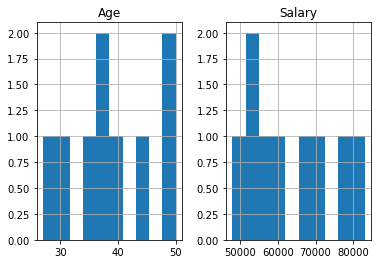

In [17]:
wf[['Country','Age','Salary','Purchased']].hist()

In [18]:
import seaborn as sns

<AxesSubplot:xlabel='Age', ylabel='Density'>

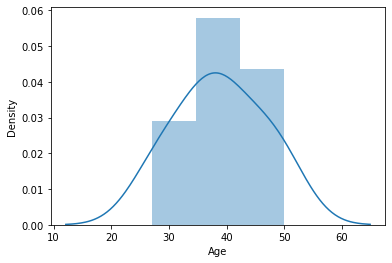

In [19]:
sns.distplot(wf['Age'])

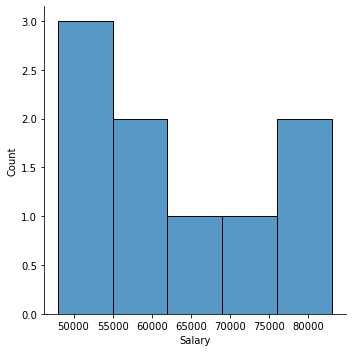

In [20]:
sns.displot(wf['Salary'])

<AxesSubplot:xlabel='Age', ylabel='count'>

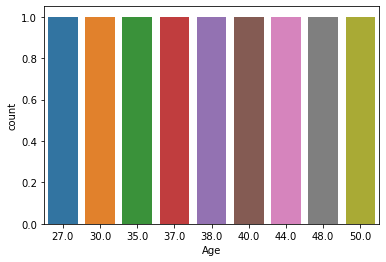

In [21]:
sns.countplot(wf['Age'])

<AxesSubplot:>

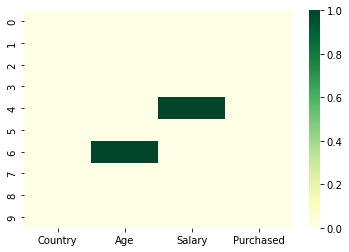

In [22]:
sns.heatmap(wf.isnull(),cmap='YlGn')

In [23]:
wf= df.copy()

In [24]:
wf

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes
5,France,35.0,58000.0,Yes
6,Spain,NaN,52000.0,No
7,France,48.0,79000.0,Yes
8,Germany,50.0,83000.0,No
9,France,37.0,67000.0,Yes


In [25]:
wf.drop([4,6], inplace = True)

In [26]:
wf

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
5,France,35.0,58000.0,Yes
7,France,48.0,79000.0,Yes
8,Germany,50.0,83000.0,No
9,France,37.0,67000.0,Yes


In [27]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [28]:
wf['Country']= le.fit_transform(wf['Country'])

In [29]:
wf['Purchased']= le.fit_transform(wf['Purchased'])

In [30]:
wf

,Country,Age,Salary,Purchased
0,0,44.0,72000.0,0
1,2,27.0,48000.0,1
2,1,30.0,54000.0,0
3,2,38.0,61000.0,0
5,0,35.0,58000.0,1
7,0,48.0,79000.0,1
8,1,50.0,83000.0,0
9,0,37.0,67000.0,1


In [31]:
from sklearn.model_selection import train_test_split

In [32]:
features = ['Country','Age','Salary','Purchased']
x = wf.loc[:, features]
y = wf.loc[:, ['Purchased']]

In [33]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0, train_size = .75)

In [34]:
from sklearn.tree import DecisionTreeRegressor

In [35]:
reg = DecisionTreeRegressor(max_depth = 2, random_state = 0)

In [36]:
reg.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=2, random_state=0)

In [37]:
reg.predict(x_test[0:10])

array([0., 0.])

In [38]:
x_test.head(1)

,Country,Age,Salary,Purchased
8,1,50.0,83000.0,0


In [39]:
x_train.shape

(6, 4)

In [40]:
x_test.shape

(2, 4)

In [41]:
y_test.shape

(2, 1)

In [42]:
y_train.shape

(6, 1)

In [43]:
reg.predict(x_test.iloc[0].values.reshape(1,-1))

array([0.])

In [44]:
score = reg.score(x_test, y_test)
print(score)

1.0


In [45]:
from sklearn import preprocessing
# normalize the data attributes
normalized = preprocessing.normalize(wf)
print("Normalized Data = ", normalized)

Normalized Data =  [[0.00000000e+00 6.11110997e-04 9.99999813e-01 0.00000000e+00]
 [4.16666600e-05 5.62499910e-04 9.99999841e-01 2.08333300e-05]
 [1.85185157e-05 5.55555470e-04 9.99999846e-01 0.00000000e+00]
 [3.27868789e-05 6.22950698e-04 9.99999805e-01 0.00000000e+00]
 [0.00000000e+00 6.03448166e-04 9.99999818e-01 1.72413762e-05]
 [0.00000000e+00 6.07594825e-04 9.99999815e-01 1.26582255e-05]
 [1.20481906e-05 6.02409529e-04 9.99999818e-01 0.00000000e+00]
 [0.00000000e+00 5.52238722e-04 9.99999847e-01 1.49253709e-05]]


In [46]:
from sklearn.datasets import load_iris

In [47]:
from sklearn import preprocessing
data = load_iris()
 
# separate the independent and dependent variables
X_data = data.data
target = data.target
 
# standardization of dependent variables
standard = preprocessing.scale(X_data)
print(standard)

[[-9.00681170e-01  1.01900435e+00 -1.34022653e+00 -1.31544430e+00]
 [-1.14301691e+00 -1.31979479e-01 -1.34022653e+00 -1.31544430e+00]
 [-1.38535265e+00  3.28414053e-01 -1.39706395e+00 -1.31544430e+00]
 [-1.50652052e+00  9.82172869e-02 -1.28338910e+00 -1.31544430e+00]
 [-1.02184904e+00  1.24920112e+00 -1.34022653e+00 -1.31544430e+00]
 [-5.37177559e-01  1.93979142e+00 -1.16971425e+00 -1.05217993e+00]
 [-1.50652052e+00  7.88807586e-01 -1.34022653e+00 -1.18381211e+00]
 [-1.02184904e+00  7.88807586e-01 -1.28338910e+00 -1.31544430e+00]
 [-1.74885626e+00 -3.62176246e-01 -1.34022653e+00 -1.31544430e+00]
 [-1.14301691e+00  9.82172869e-02 -1.28338910e+00 -1.44707648e+00]
 [-5.37177559e-01  1.47939788e+00 -1.28338910e+00 -1.31544430e+00]
 [-1.26418478e+00  7.88807586e-01 -1.22655167e+00 -1.31544430e+00]
 [-1.26418478e+00 -1.31979479e-01 -1.34022653e+00 -1.44707648e+00]
 [-1.87002413e+00 -1.31979479e-01 -1.51073881e+00 -1.44707648e+00]
 [-5.25060772e-02  2.16998818e+00 -1.45390138e+00 -1.31544430e

2nd Lab